In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import the cv2_imshow function from google.colab.patches

# Load the reference image and the modified image
ref_image_path = "/content/page1.JPG"
mod_image_path = "/content/page2.JPG"
ref_image = cv2.imread(ref_image_path, cv2.IMREAD_GRAYSCALE)
mod_image = cv2.imread(mod_image_path, cv2.IMREAD_GRAYSCALE)

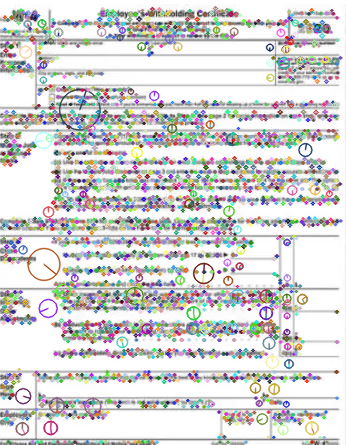

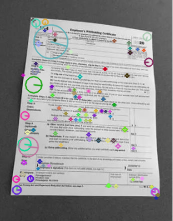

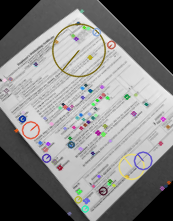

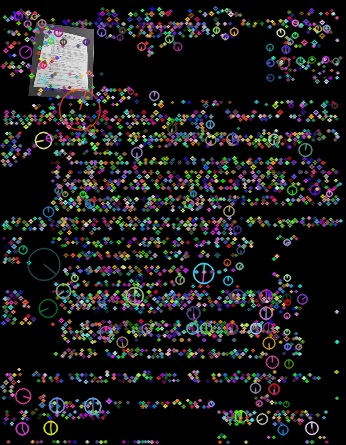

In [12]:
from matplotlib import pyplot as plt

# Function to detect key points and compute descriptors
def detect_keypoints_and_descriptors(image):
  sift = cv2.SIFT_create()
  keypoints, descriptors = sift.detectAndCompute(image, None)
  return keypoints, descriptors
# Task 1:
ref_keypoints, ref_descriptors = detect_keypoints_and_descriptors(ref_image)

# Task 2:
resized_mod_image = cv2.resize(mod_image, (mod_image.shape[1] // 2, mod_image.shape[0] // 2))

# Task 3:
(h, w) = resized_mod_image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_mod_image = cv2.warpAffine(resized_mod_image, rotation_matrix, (w, h))

# Task 4:
resized_keypoints, resized_descriptors = detect_keypoints_and_descriptors(resized_mod_image)
rotated_keypoints, rotated_descriptors = detect_keypoints_and_descriptors(rotated_mod_image)

# Task 5:
bf = cv2.BFMatcher()
matches = bf.knnMatch(ref_descriptors, resized_descriptors, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

src_pts = np.float32([ref_keypoints[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([resized_keypoints[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
homography, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Task 6:
warped_mod_image = cv2.warpPerspective(resized_mod_image, homography, (ref_image.shape[1], ref_image.shape[0]))

# Draw the keypoints on the images
ref_image_with_keypoints = cv2.drawKeypoints(ref_image, ref_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
resized_image_with_keypoints = cv2.drawKeypoints(resized_mod_image, resized_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
rotated_image_with_keypoints = cv2.drawKeypoints(rotated_mod_image, rotated_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
warped_image_with_keypoints = cv2.drawKeypoints(warped_mod_image, ref_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # Use ref_keypoints for consistent visualization

# Save the images with keypoints
cv2.imwrite("/mnt/data/ref_image_with_keypoints.jpg", ref_image_with_keypoints)
cv2.imwrite("/mnt/data/resized_image_with_keypoints.jpg", resized_image_with_keypoints)
cv2.imwrite("/mnt/data/rotated_image_with_keypoints.jpg", rotated_image_with_keypoints)
cv2.imwrite("/mnt/data/warped_image_with_keypoints.jpg", warped_image_with_keypoints)

# Display the images with keypoints (optional)
cv2_imshow(ref_image_with_keypoints) # Use cv2_imshow instead of cv2.imshow
cv2_imshow(resized_image_with_keypoints) # Use cv2_imshow instead of cv2.imshow
cv2_imshow(rotated_image_with_keypoints) # Use cv2_imshow instead of cv2.imshow
cv2_imshow(warped_image_with_keypoints) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()



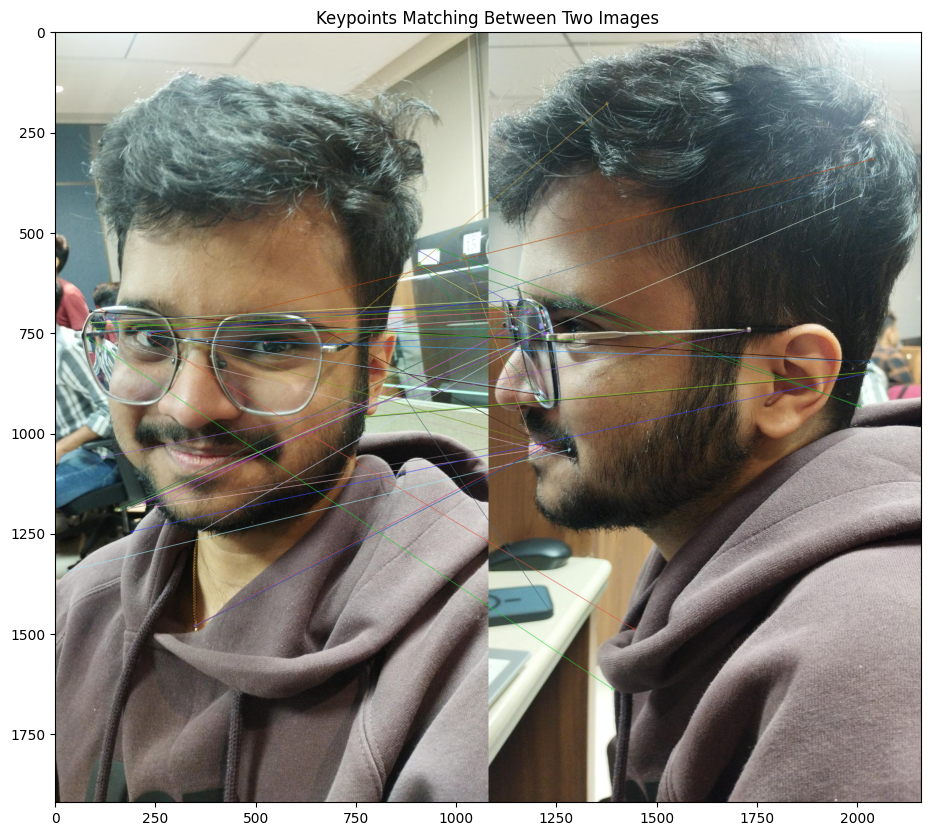

Homography Matrix:
[[-1.02222364e-01 -3.21015647e-02  1.11424275e+02]
 [-1.02653993e+00 -2.18175430e-01  1.05453223e+03]
 [-9.91837411e-04 -1.78740943e-04  1.00000000e+00]]


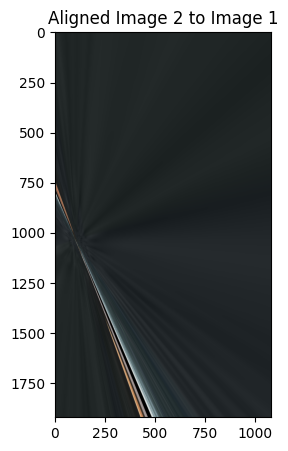

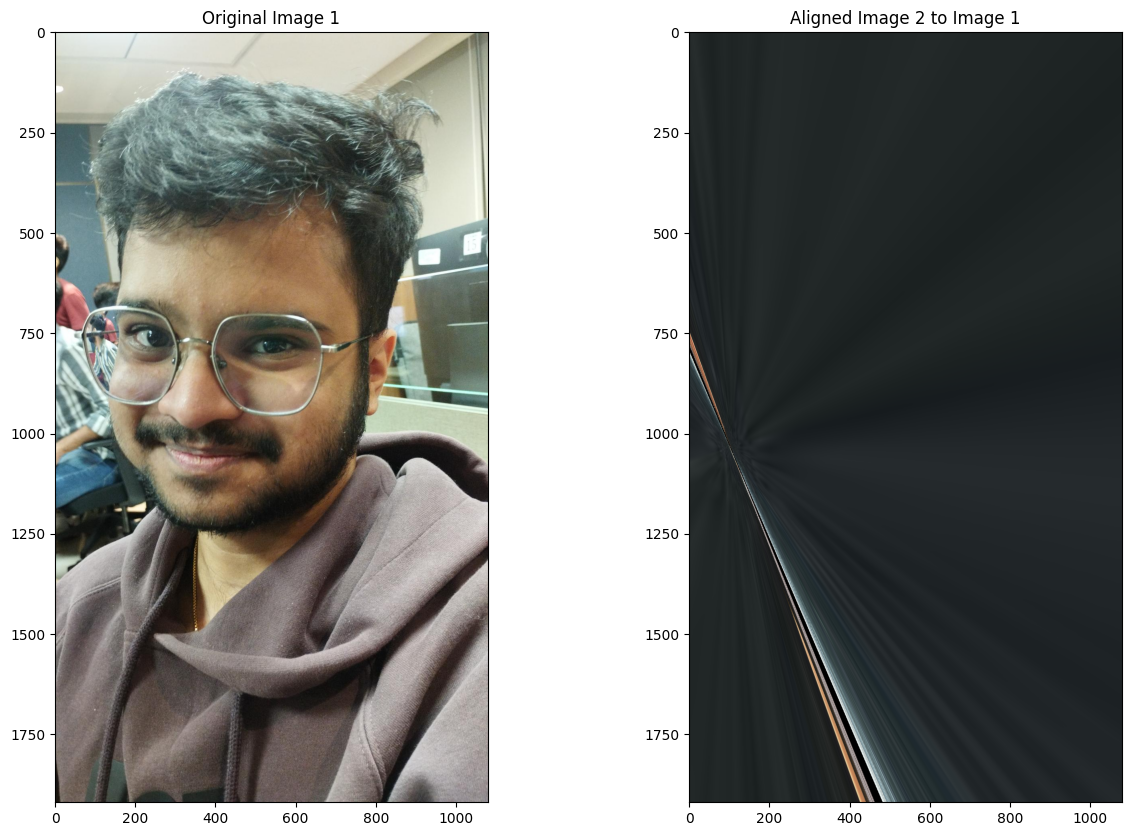

In [14]:
#Task 7:clicking two images from camera
# Load the two images taken from different directions
image1 = cv2.imread('/content/Media (1).jpeg')
image2 = cv2.imread('/content/Media.jpeg')

# Convert both images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors in both images
keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

# Use BFMatcher to find matching keypoints between the two images
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the first 50 matches for visualization
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=2)

# Display the matched keypoints
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title("Keypoints Matching Between Two Images")
plt.show()

# Extract the locations of matched keypoints
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Compute the homography matrix
homography_matrix, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

print("Homography Matrix:")
print(homography_matrix)

# Warp the second image to align with the first image
height, width, channels = image1.shape
warped_image = cv2.warpPerspective(image2, homography_matrix, (width, height))

# Display the aligned (warped) image
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image 2 to Image 1')
plt.show()

# Display the two images side by side for comparison (image1 and the warped image)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image 2 to Image 1')
plt.show()

conclusion: for 400 keypoints and the top 10% of the matching keypoints, the aligned image shows that homography matrix has aligned the image to be aligned. Results show that the reference image and the aligned image are similar. For better alignment, the number of  keypoints can be increased to larger values.